<span style='font-size:xx-large'>**Neutrino Flavour Transitions Using the PMNS Matrix and Oscillation Probability**</span>

<span style='font-size:x-large'>**Vaamini Mathimaran \- 231179489 \-** </span>[<span style='font-size:x-large'>Ap23210@qmul.ac.uk</span>](mailto:Ap23210@qmul.ac.uk)<span style='font-size:x-large'> </span>



<span style='font-size:large'>Introduction</span>



Neutrinos exist in three flavors: electron neutrinos ($\nu_e$), muon neutrinos ($\nu_\mu$), and tau neutrinos ($\nu_\tau$). Neutrinos oscillate because the flavor eigenstates are different from the mass eigenstates. The PMNS (Pontecorvo-Maki-Nakagawa-Sakata) matrix describes the mixing of these flavors [1].

Using the oscillation probability formula, we can calculate the probability of a neutrino of one flavor transitioning into another flavor based on the distance traveled ($L$), the neutrino's energy ($E$), and the mass-squared difference ($\Delta m^2$) [1].

This study is important because neutrino oscillations are fundamental to understanding the Standard Model and its extensions. They also provide insights into matter-antimatter asymmetry in the universe and the fundamental properties of neutrinos [1, 2].

In this project, I analyzed three cases of neutrino flavor transitions:  electron neutrino ($\nu_e \to \nu_\mu$), electron neutrino ($\nu_e \to \nu_\tau$), and muon neutrino ($\nu_\mu \to \nu_\tau$).Using the PMNS matrix and oscillation probability formula, I calculated the probabilities for these transitions and applied them to real neutrino flux data from NOvA [2]. The results, visualized through graphs, demonstrate how the flux changes due to oscillations. For all three cases, the flux exhibits wave-like behavior, peaking at $0.75 \, \text{GeV}$ due to constructive interference, and decaying smoothly thereafter.



<span style='font-size:large'>Method </span>




I used the PMNS matrix, which describes the mixing of neutrino flavor eigenstates and mass eigenstates:

$$U =\begin{bmatrix}
c_{12}c_{13} & s_{12}c_{13} & s_{13}e^{-i\delta} \\
-s_{12}c_{23} - c_{12}s_{23}s_{13}e^{i\delta} & c_{12}c_{23} - s_{12}s_{23}s_{13}e^{i\delta} & s_{23}c_{13} \\
s_{12}s_{23} - c_{12}c_{23}s_{13}e^{i\delta} & -c_{12}s_{23} - s_{12}c_{23}s_{13}e^{i\delta} & c_{23}c_{13}
\end{bmatrix}[3]$$.

The mixing angles $\theta_{12}$, $\theta_{13}$, and $\theta_{23}$ describe the mixing between neutrino mass and flavor eigenstates. $\theta_{12}$ is significant for solar neutrino oscillations, $\theta_{13}$ for reactor neutrino oscillations, and $\theta_{23}$ for atmospheric neutrino oscillations. The complex phase $\delta$ introduces CP violation, adding $e^{\pm i\delta}$ terms to the PMNS matrix. Trigonometric functions $\sin(\theta)$ and $\cos(\theta)$ are used to compute the PMNS matrix elements, determining the probabilities of flavor transitions [2].


In [2]:
#programming a function for PMNS matrix 

def pmns_matrix(t_12,t_13,t_23,d_cp):

#t_12 - mixing angle in radian between v1 and v2 
#t_13 - mixing angle in radian between v1 and v3
#t_23 - mixing angle in radian between v2 and v3 
#d_cp - complex phase that introduces a difference between neutrino and antineutrino 

    s_12 = np.sin(t_12)
    s_13 = np.sin(t_13)
    s_23 = np.sin(t_23)
    c_12 = np.cos(t_12)
    c_13 = np.cos(t_13)
    c_23 = np.cos(t_23)
    
    #formula for U aka PMNS matrix is on wikipedia 
    U = np.array([[c_12*c_13,s_12*c_13,s_13*np.exp(-1j*d_cp)],[-(s_12*c_23)-(c_12*s_23*s_13*np.exp(1j*d_cp)),(c_12*c_23)-(s_12*s_23*s_13*np.exp(1j*d_cp)),s_23*c_13],[(s_12*s_23)-(c_12*c_23*s_13*np.exp(1j*d_cp)),-(c_12*s_23)-(s_12*c_23*s_13*np.exp(1j*d_cp)),c_23*c_13]])
    return U #returns a 3x3 matrix

I then used the oscilation probabiolity formula to calculate the probability of  neutrino flavour changing: 
$$
P(\nu_\alpha \to \nu_\beta) = \left| \sum_{i,j} U_{\alpha i}^* U_{\beta i} U_{\alpha j} U_{\beta j}^* e^{-i \Delta_{ij}} \right|^2[1]
$$

Where:
$$
\Delta_{ij} = 1.27 \cdot \frac{\Delta m^2_{ij} \cdot L}{E}
$$
is the oscillation phase.

- $\Delta m^2_{ij}$: Mass-squared difference between states $i$ and $j$.
- $L$: Baseline distance (in km).
- $E$: Neutrino energy (in GeV).



In [3]:
#programming a function for osclation probability

#U - PMNS matrix
#d_m2 - list of mass squared difference of neutrino eigenstate 
#L - distance neytrino travells from source to detector 
#E - neutrino energy 
#alpha - initial neutrino flavour 
#beta - final neutrino flavour 

def oscillation_probability(U,d_m2,L,E,alpha,beta):
   
    #oscilation phase
    oscilation_phase = [1.27 * d_m * L/E for d_m in d_m2]
    
    #compute probsability by looping over mass eigenstate 
    prob = 0 #initialize probabilty 
    for i in range(3): #loop over list in d_m3
        for j in range(3):
            if i != j:
                phase = np.exp(-1j * oscilation_phase[i-j]) #oscilation phase
            else:
                phase = 1
           #add to probability 
            prob += (U[alpha,i].conj()*U[beta,i]*U[alpha,j]*U[beta,j].conj()*phase)
    return np.abs(prob)**2      

I used a dataset from NOvA, specifically the NOvA flux data for forward horn current (FHC). This dataset includes minimum and maximum energy values, flux values, and fractional uncertainties. I chose this dataset because it provides real experimental data and covers a range of energy values, making it suitable for studying neutrino oscillations. Since the dataset provides only the minimum and maximum energy for each bin, I calculated the midpoint energy as a representative value for further calculations [2].


In [7]:
#load file with data
#path to access file 
file_path = "NOVA_flux_nue"
#name the columns 
columns = ["emin","emax","nus","fe"]
#read the data 
data = pd.read_csv(file_path,delim_whitespace=True,skiprows=5,names=columns)

#bins so we need the midpoint 
data['E_mid'] = (data['emin']+data['emax'])/2

Before working with the dataset and function, I installed all the necessary libraries.



In [10]:
#importing libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as stats 

To compute the PMNS matrix, I initialized key physical parameters based on experimentally determined values. I set the baseline distance ($L$) to 810 km, corresponding to the distance traveled by neutrinos in the NOvA experiment [1]. 

The mass-squared differences ($\Delta m^2$) were defined as:
$$
\Delta m^2_{21} = 7.42 \times 10^{-5} \, \text{eV}^2, \quad \Delta m^2_{32} = 2.517 \times 10^{-3} \, \text{eV}^2,
$$
and:
$$
\Delta m^2_{31} = \Delta m^2_{32} + \Delta m^2_{21},
$$
calculated as the sum of the other two values. I used these parameters from the latest global fits to neutrino oscillation data [2].

I set the mixing angles ($\theta_{12}$, $\theta_{13}$, $\theta_{23}$) to:
$$
\theta_{12} = 33.44^\circ, \quad \theta_{13} = 8.57^\circ, \quad \theta_{23} = 49.2^\circ,
$$
based on experimental observations reported by the Particle Data Group [2]. The CP-violating phase ($\delta$) was set to:
$$
\delta = 222^\circ,
$$
consistent with measurements from global neutrino oscillation analyses [2].

I then passed these parameters to the `pmns_matrix` function to compute the PMNS matrix ($U$), which describes the mixing of neutrino flavor and mass eigenstates.


In [8]:
#parameters 
L = 810
d_m2 = [7.42e-5,2.517e-3,2.517e-3 + 7.42e-5]
t_12=np.radians(33.44)
t_13=np.radians(8.57)
t_23=np.radians(49.2)
d_cp=np.radians(222)

#compute MAtrix 
U = pmns_matrix(t_12,t_13,t_23,d_cp)

I applied the oscillation probability formula [1] to the midpoint of the energy bins in the dataset to calculate the probability of neutrino flavor change in three cases. The first case is the transition from electron neutrino to muon neutrino ($\nu_e \to \nu_\mu$), where $\alpha = 0$ and $\beta = 1$; the resulting probabilities are stored in 'P\_nue\_to\_numu'. The second case is the transition from electron neutrino to tau neutrino ($\nu_e \to \nu_\tau$), where $\alpha = 0$ and $\beta = 2$; these probabilities are stored in 'P\_nue\_to\_nuta'. The third case is the transition from muon neutrino to tau neutrino ($\nu_\mu \to \nu_\tau$), where $\alpha = 1$ and $\beta = 2$; these probabilities are stored in 'P\_numu\_to\_nuta'.

I chose these three cases because they cover all three neutrino flavors, probe both flavor-changing transitions, and involve critical parameters such as the mixing angles, mass-squared differences, and the CP-violating phase [1]. These cases also align well with the NOvA dataset used in this analysis [2].


In [9]:
# Calculate probability - electron to muon 
data['P_nue_to_numu'] = data['E_mid'].apply(lambda E: oscillation_probability(U, d_m2, L, E, alpha=0, beta=1))

# Compute oscillated flux - electron to muon 
data['oscillated_flux'] = data['nus'] * data['P_nue_to_numu']  

# Calculate probability - electron to tau 
data['P_nue_to_nuta'] = data['E_mid'].apply(lambda E: oscillation_probability(U, d_m2, L, E, alpha=0, beta=2))

# Compute oscillated flux - electron to tau 
data['oscillated_flux_2'] = data['nus'] * data['P_nue_to_nuta']  

# Calculate probability - muon to tau 
data['P_numu_to_nuta'] = data['E_mid'].apply(lambda E: oscillation_probability(U, d_m2, L, E, alpha=1, beta=2))

# Compute oscillated flux - muon to tau 
data['oscillated_flux_3'] = data['nus'] * data['P_numu_to_nuta']  

<span style='font-size:large'>Result </span>



To visualize the effects of neutrino oscillations, I plotted the original neutrino flux alongside the oscillated flux for three cases of flavor transitions: electron neutrino ($\nu_e$) to muon neutrino ($\nu_\mu$), electron neutrino ($\nu_e$) to tau neutrino ($\nu_\tau$), and muon neutrino ($\nu_\mu$) to tau neutrino ($\nu_\tau$). The energy bin midpoints were used as the x-axis, while the flux values were displayed on the y-axis. The original flux was represented in blue, and the oscillated fluxes for the three cases were shown in red, pink, and orange, respectively. The plot includes labels for clarity, a legend to differentiate between the flux types, and a grid for better visualization. This plot demonstrates how the neutrino flux changes for each flavor transition across different energy levels.



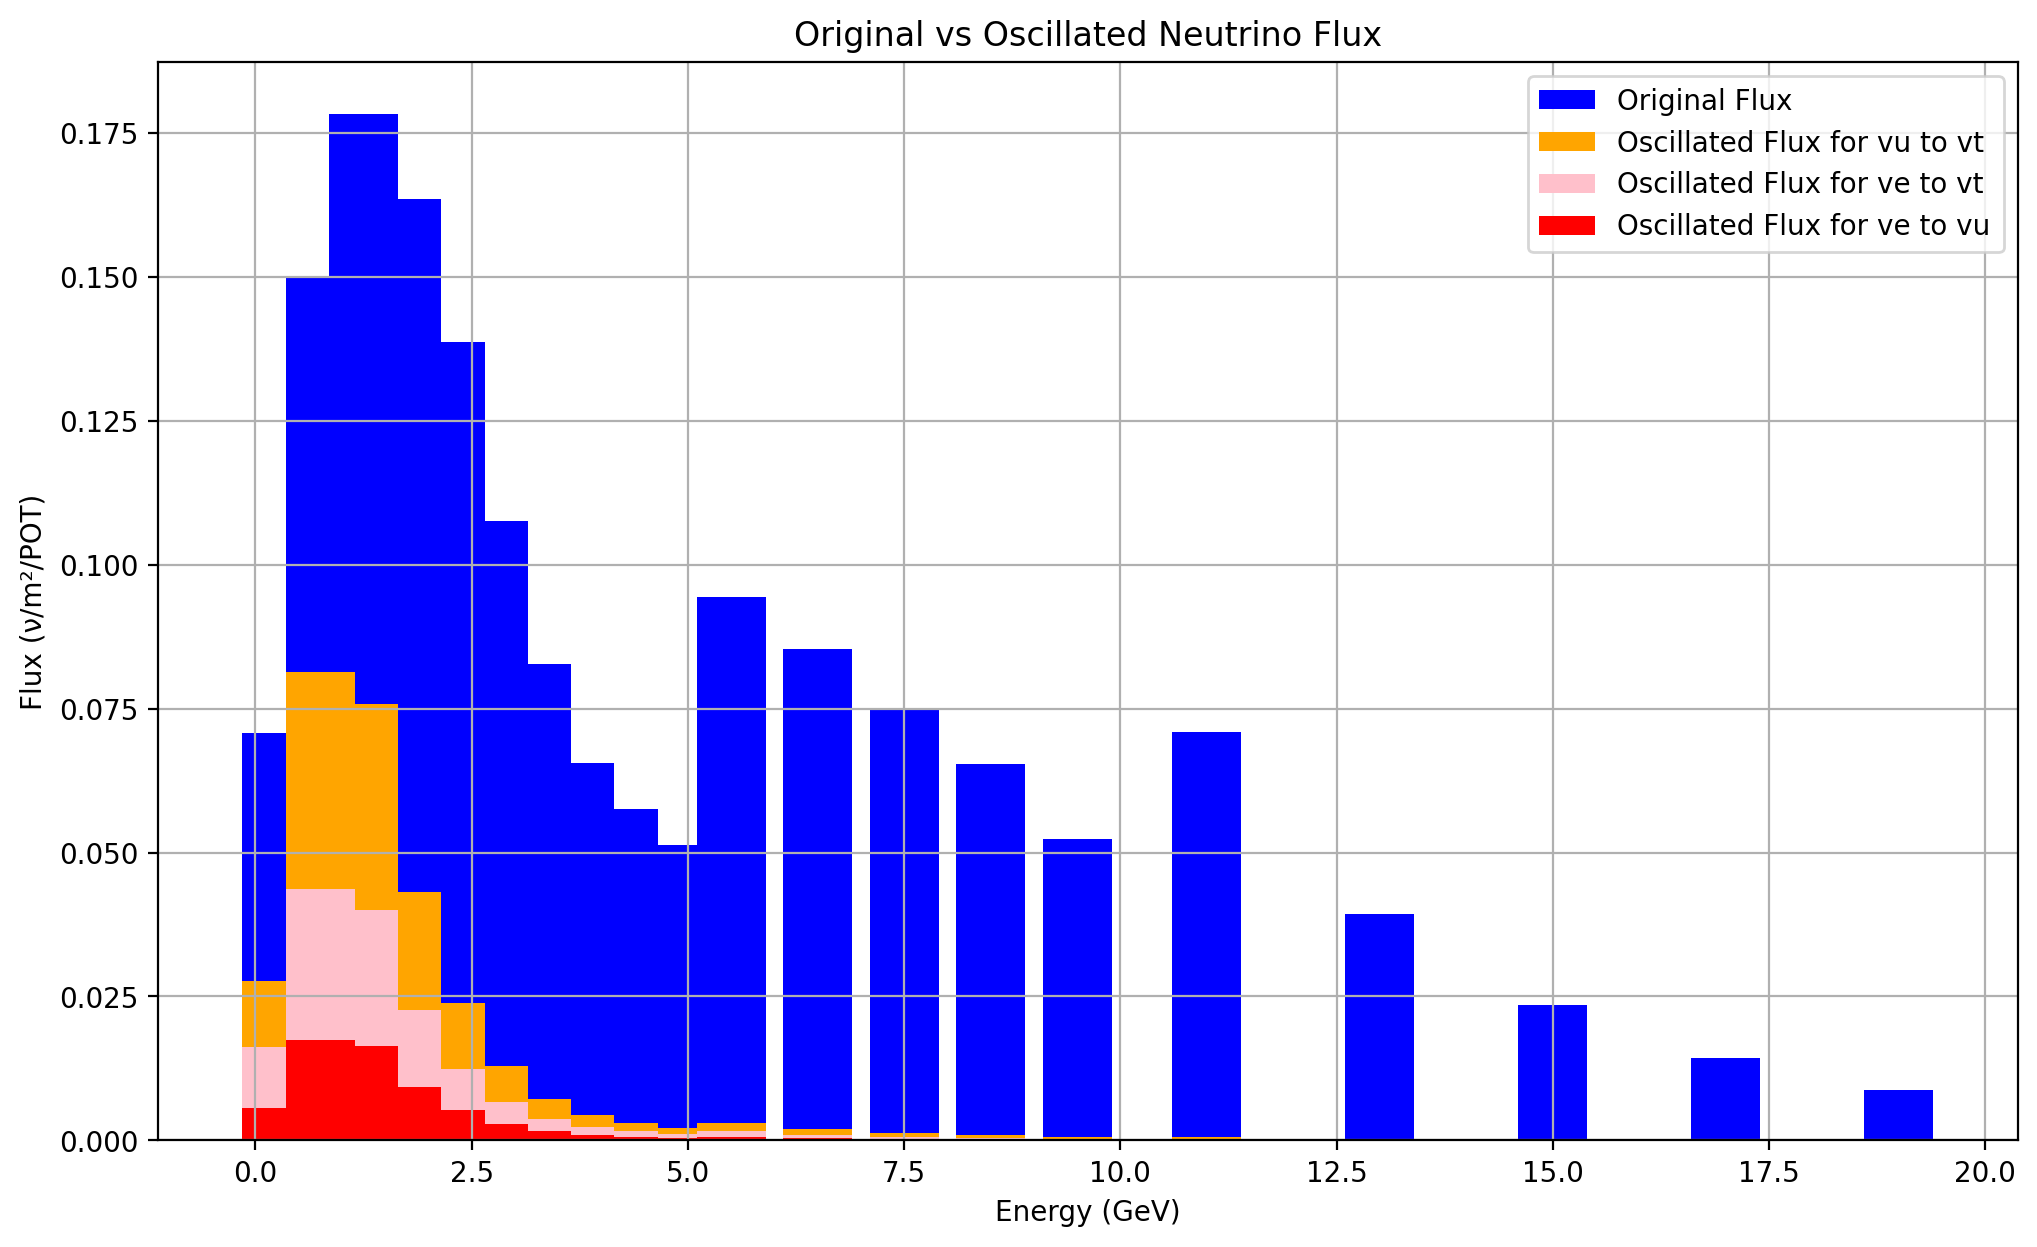

In [15]:
# Plot the original and oscillated flux
plt.figure()
plt.bar(data['E_mid'], data['nus'],label="Original Flux",color = 'blue')
plt.bar(data['E_mid'], data['oscillated_flux_3'],label="Oscillated Flux for vu to vt ",color='orange')
plt.bar(data['E_mid'], data['oscillated_flux_2'],label="Oscillated Flux for ve to vt",color='pink')
plt.bar(data['E_mid'], data['oscillated_flux'],label="Oscillated Flux for ve to vu",color='red')
plt.xlabel("Energy (GeV)")
plt.ylabel("Flux (ν/m²/POT)")
plt.legend()
plt.title("Original vs Oscillated Neutrino Flux")
plt.grid()
plt.savefig("Original_vs_Oscillated_Neutrino_Flux.png")
plt.show()

![Original vs Oscillated Neutrino Flux](Original_vs_Oscillated_Neutrino_Flux.png)

This plot visualizes the oscillation probabilities for three neutrino flavor transitions as a function of energy. The probabilities for $\nu_e \to \nu_\mu$, $\nu_e \to \nu_\tau$, and $\nu_\mu \to \nu_\tau$ are represented by red, pink, and orange lines, respectively, with markers highlighting the energy bin midpoints. The x-axis corresponds to the energy in GeV, while the y-axis displays the oscillation probability. The plot includes a legend for clarity and a grid for better visualization. The results demonstrate the wave-like behavior of oscillation probabilities, reflecting the characteristic interference patterns of neutrino oscillations.


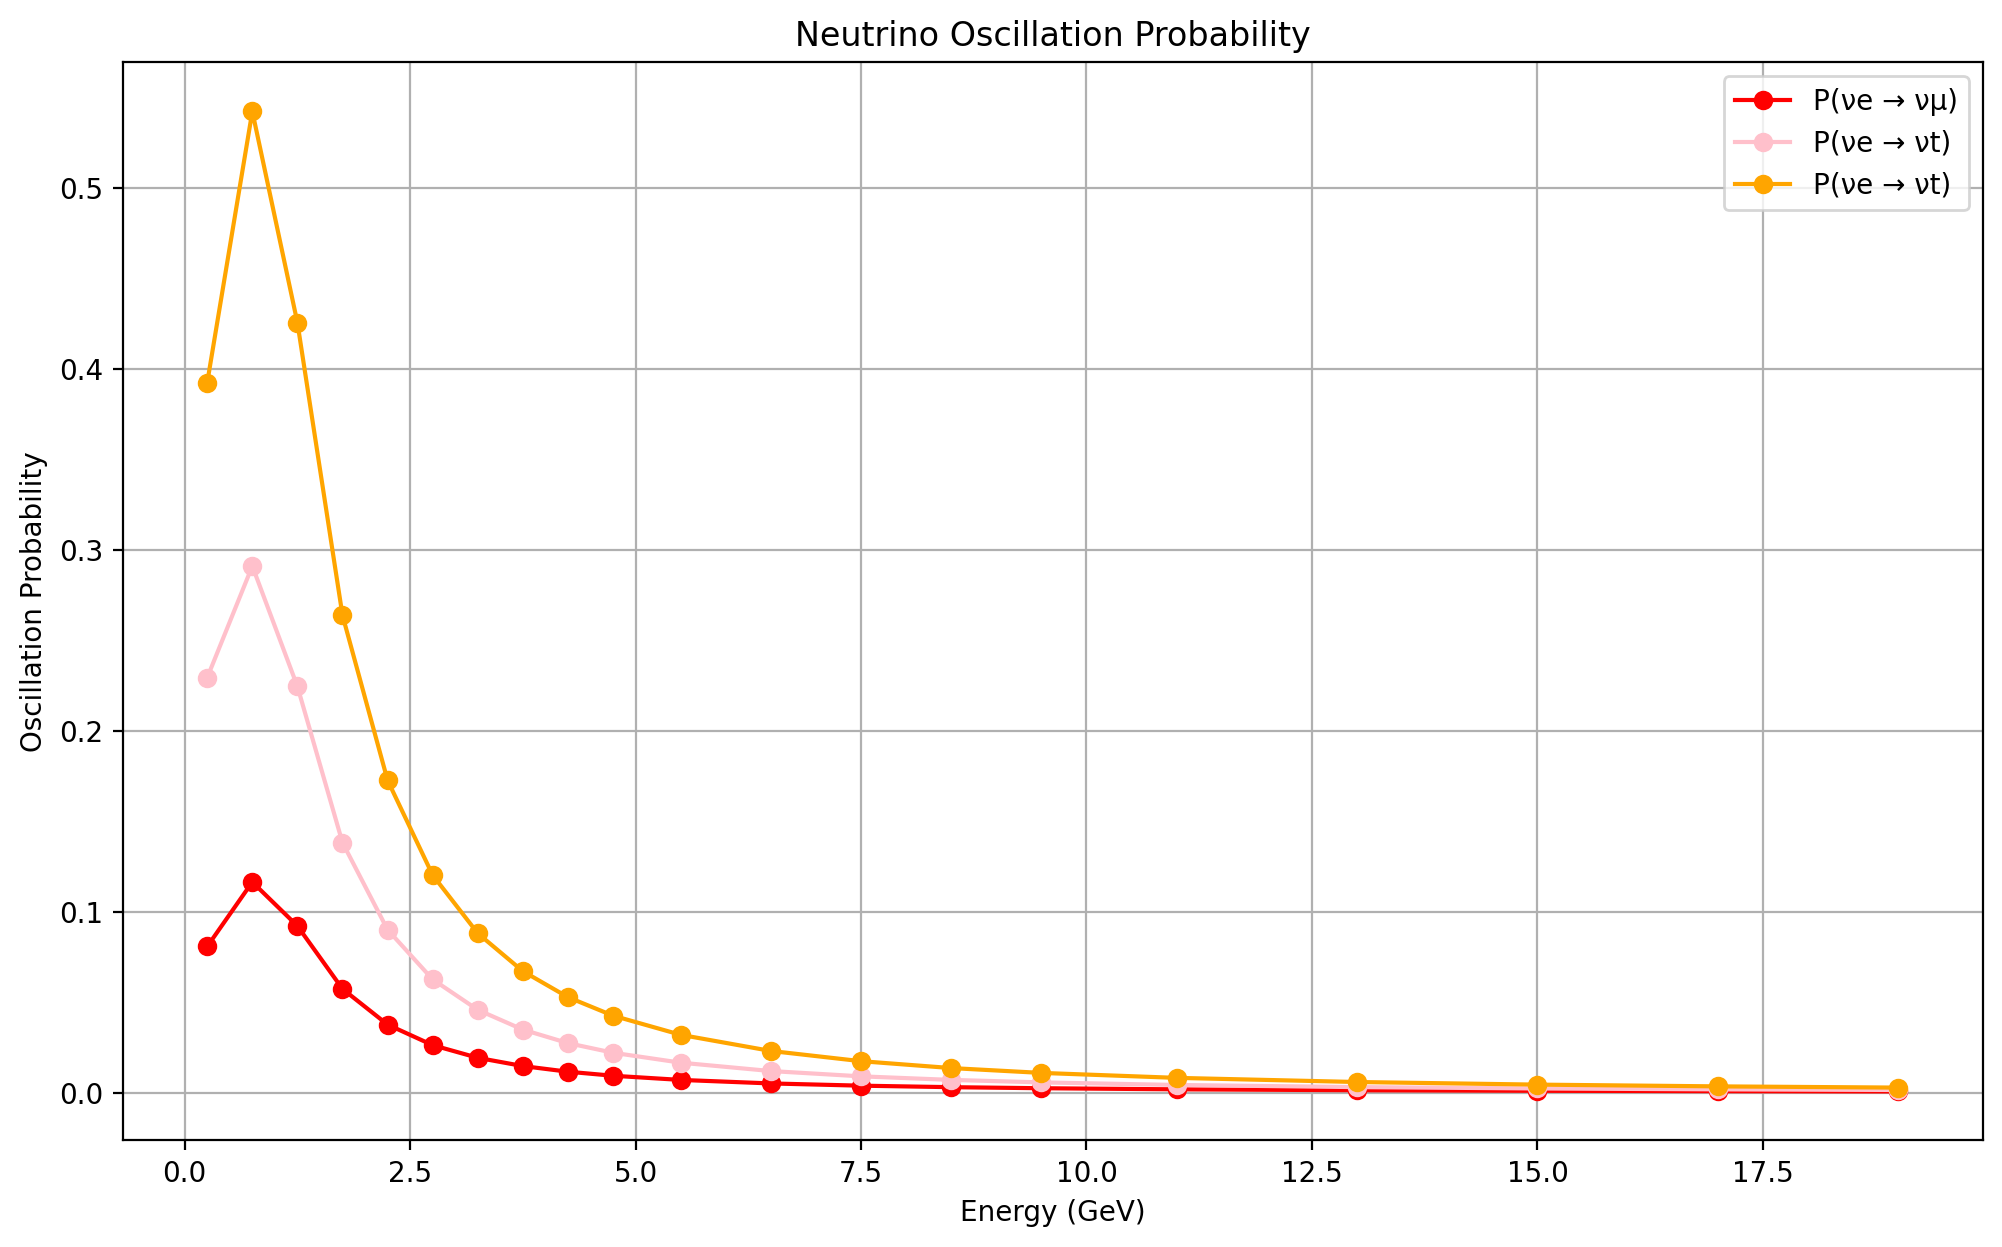

In [16]:
#plot oscilation probavility 
plt.figure()
plt.plot(data['E_mid'], data['P_nue_to_numu'], marker='o', label="P(νe → νμ)", color='red')
plt.plot(data['E_mid'], data['P_nue_to_nuta'], marker='o', label="P(νe → νt)", color='pink')
plt.plot(data['E_mid'], data['P_numu_to_nuta'], marker='o', label="P(νe → νt)", color='orange')
plt.xlabel("Energy (GeV)")
plt.ylabel("Oscillation Probability")
plt.title("Neutrino Oscillation Probability")
plt.legend()
plt.grid()
plt.savefig("Neutrino_Oscillation_Probability.png")
plt.show()

![Neutrino Oscillation Probability](Neutrino_Oscillation_Probability.png)

<span style='font-size:large'>Discussion </span>

The results from both graphs show how neutrino oscillations affect the neutrino flux and oscillation probabilities. The first graph compares the original flux to the oscillated flux for three different flavor transitions. The biggest reduction in flux happens for the $\nu_e \to \nu_\mu$ transition (red), followed by the $\nu_e \to \nu_\tau$ transition (pink), and the smallest change is for the $\nu_\mu \to \nu_\tau$ transition (orange). These differences are due to the mixing angles and mass-squared differences for each transition~[1, 3]. The flux also shows wave-like behavior, with a peak around $0.75 \, \text{GeV}$ because of constructive interference~[2, 4]. At higher energies, the flux smoothly decreases, as oscillations have less impact~[1].

The second graph shows how oscillation probabilities change with energy for the same three transitions. The red, pink, and orange lines represent the probabilities for $\nu_e \to \nu_\mu$, $\nu_e \to \nu_\tau$, and $\nu_\mu \to \nu_\tau$, respectively. The oscillations are strongest for the $\nu_e \to \nu_\mu$ transition. The $\nu_e \to \nu_\tau$ and $\nu_\mu \to \nu_\tau$ transitions have weaker oscillations, which is expected due to their smaller mixing angles and mass-squared differences~[1, 3]. The wave-like patterns in the probabilities show interference between neutrino mass eigenstates, with peaks and dips depending on energy~[1, 4]. The second graph also shows that oscillations are more noticeable at lower energies, matching what the first graph shows~[2, 4].

Together, these two graphs highlight how energy affects neutrino oscillations. The flux graph shows how the oscillations change the neutrino flux, while the probability graph explains these changes based on mixing angles, mass-squared differences, and interference patterns~[1, 3].



<span style='font-size:large'>Conclusion </span>


In conclusion, the first graph shows how the oscillated flux varies for the three cases of flavor transitions, revealing a wave-like behavior with a peak at $0.75 \, \mathrm{GeV}$. The second graph highlights the periodic nature of the oscillation probability and its energy dependence for all three cases, aligning well with the theory of neutrino oscillations~[1, 3] and experimental observations~[2, 4].

Some strengths of this analysis include the use of real-world data from NOvA~[2] and the clarity of the method, utilizing the PMNS matrix~[3] and the oscillation probability formula~[1]. The graphs effectively illustrate the wave-like nature of the flavor transitions. However, there were some limitations. One was the use of midpoint energy bins rather than a continuous energy spectrum, as well as the limited energy range of the data. Additionally, uncertainties and errors from the dataset and from mixing angles and mass-squared differences were not fully accounted for.

Future work could address these issues by using datasets with continuous energy spectra and a wider energy range, as well as incorporating error and uncertainty calculations for more precise results.



<span style='font-size:large'>Reference </span>



\[1\] \- Particle Data Group: P.A. Zyla et al. \(Particle Data Group\), Progress of Theoretical and Experimental Physics, 2020, 083C01. https://pdg.lbl.gov

\[2\] \- NOvA Experiment: Fermilab NOvA Collaboration, NOvA Flux Data for Forward Horn Current \(FHC\). https://novaexperiment.fnal.gov

\[3\] \- PMNS Matrix: Z. Maki, M. Nakagawa, S. Sakata, Remarks on the Unified Model of Elementary Particles, Progress of Theoretical Physics, 1962, Vol. 28, No. 5. DOI: 10.1143/PTP.28.870

\[4\] \- Neutrino Oscillation Theory: B. Pontecorvo, Mesonium and Antimesonium, Journal of Experimental and Theoretical Physics, 1957, Vol. 33, pp. 549\-551.
